In [21]:
#7. Suorita GPS-anturilla vähintään muutaman minuutin mittaus, jonka aikana liikut ulkona kävellen, pyöräillen, rullaluistellen tms. Havaintojesi perusteella:
#a)Piirrä reitti kartalle käyttäen Folium-kirjastoaa) Arvioi havaintojen luotettavuutta tarkastelemalla piirretyn reitin todenmukaisuutta.
import pandas as pd
path = 'GPS.csv'

df = pd.read_csv(path)
df.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.034829,64.986837,25.496271,NaN,NaN,NaN,NaN,0.255686,1115.672974,0.000000,-1.0
1,17.867491,64.984601,25.494996,20.625609,38.099998,NaN,NaN,0.324541,39.126999,1.313763,0.0
2,37.851491,64.984474,25.493562,20.625419,38.099998,NaN,NaN,0.329872,40.287998,1.867444,0.0
3,57.855491,64.984428,25.493530,20.625376,38.099998,NaN,NaN,0.366018,21.281000,1.031822,0.0
4,77.844491,64.984364,25.492776,20.625279,38.099998,NaN,NaN,0.378309,39.827999,2.563263,0.0


In [22]:
import folium


#Kartan keskipisteen määrittäminen ja (mittakaava, zoom)
lat_mean = df['Latitude (°)'].mean()
lon_mean = df['Longitude (°)'].mean()

#Luodaan kartta
mun_kartta = folium.Map(location = [lat_mean,lon_mean], zoom_start = 14)

#Piirrustellaan
folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'green', opacity = 1).add_to(mun_kartta)

#Tallennetaan reitti
mun_kartta.save('Karttanimun.html')
mun_kartta

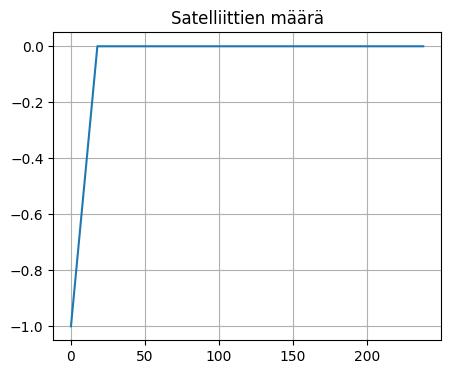

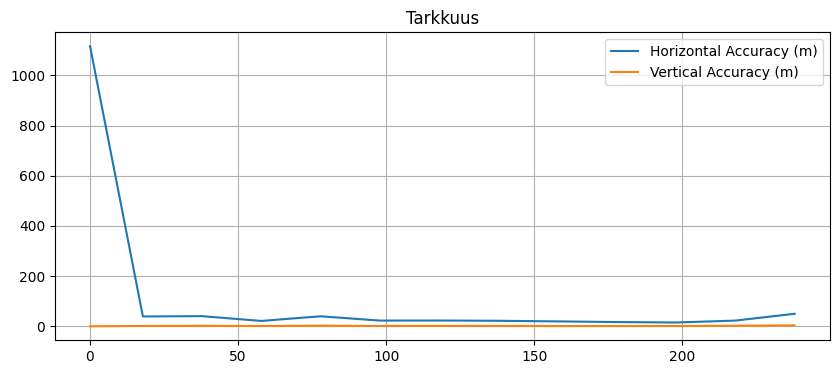

In [23]:
#b)Olin juuri laittamassa GPS:ää päälle aloittaessani mittausta, niin se näyttää vähän hassulta - en mennyt alikuluista yms., joten signaali ihan ok suurimman osan ajasta
 
#c)Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. Miten ne näkyvät karttakuvassa
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'],df['Satellites'])
plt.grid()
plt.title('Satelliittien määrä')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'],df['Horizontal Accuracy (m)'])
plt.plot(df['Time (s)'],df['Vertical Accuracy (m)'])
plt.legend(['Horizontal Accuracy (m)','Vertical Accuracy (m)'])
plt.grid()
plt.title('Tarkkuus')
plt.show()

In [24]:
#HAVERSINEN KAAVA:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2 = map(radians,[lon1,lat1,lon2,lat2])#Desimaalit asteiksi

lat = df['Latitude (°)']
lon = df['Longitude (°)']

df['dist'] = np.zeros(len(df)) #Alustetaan sarake etäisyydelle

for i in range(0,(len(df)-1)):
    df.loc[i,'dist'] = haversine(lon[i],lat[i],lon[i+1],lat[i+1])#Peräkkäisten pisteiden välimatka

df['tot_dist'] = np.cumsum(df['dist']) #Kokonaismatka


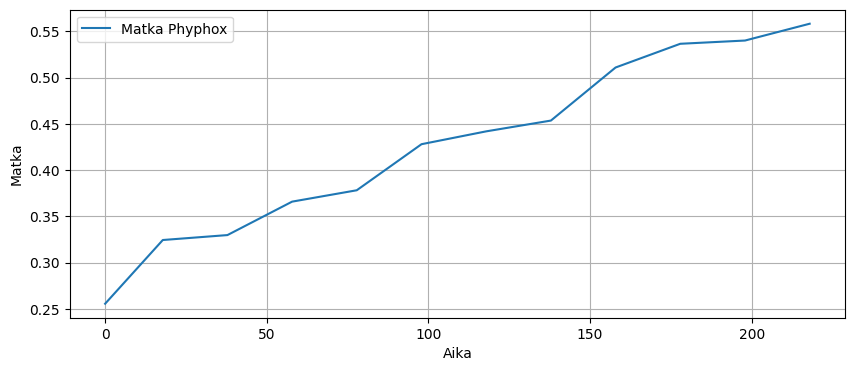

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,tot_dist
0,0.034829,64.986837,25.496271,NaN,NaN,NaN,NaN,0.255686,1115.672974,0.000000,-1.0,NaN,NaN
1,17.867491,64.984601,25.494996,20.625609,38.099998,NaN,NaN,0.324541,39.126999,1.313763,0.0,NaN,NaN
2,37.851491,64.984474,25.493562,20.625419,38.099998,NaN,NaN,0.329872,40.287998,1.867444,0.0,NaN,NaN
3,57.855491,64.984428,25.493530,20.625376,38.099998,NaN,NaN,0.366018,21.281000,1.031822,0.0,NaN,NaN
4,77.844491,64.984364,25.492776,20.625279,38.099998,NaN,NaN,0.378309,39.827999,2.563263,0.0,NaN,NaN
5,97.867491,64.984407,25.493016,21.525332,39.000000,NaN,NaN,0.428091,22.684000,1.143057,0.0,NaN,NaN
6,117.881491,64.983973,25.492764,21.324922,38.799999,NaN,NaN,0.441978,22.971001,1.352621,0.0,NaN,NaN
7,137.877491,64.983852,25.492689,21.324807,38.799999,NaN,NaN,0.453626,21.912001,1.000000,0.0,NaN,NaN
8,157.872491,64.983956,25.492702,21.224905,38.700001,NaN,NaN,0.510975,19.434000,1.000000,0.0,NaN,NaN
9,177.875491,64.983964,25.493922,21.324972,38.799999,NaN,NaN,0.536618,16.851999,1.000000,0.0,NaN,NaN


In [25]:


plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'],df['Distance (km)'])
plt.legend(['Matka Phyphox'])
plt.grid()
plt.ylabel('Matka')
plt.xlabel('Aika')
plt.show()
display(df)